In [1]:
"""
Linear Regression
author hadxu(hadxu123@gmail.com)
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print 'Package loaded'

Package loaded


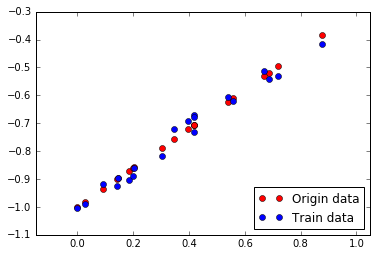

In [2]:
#Generate training data
np.random.seed(1)
def f(x,a,b):
    n = train_X.size
    vals = np.zeros((1,n))
    for i in range(0,n):
        ax = np.multiply(a,x.item(i))
        val = np.add(ax,b)
        vals[0,i] = val
    return vals
Wref = 0.7
bref  = -1
n = 20
noise_var =0.001
train_X = np.random.random((1,n))
ref_Y = f(train_X,Wref,bref)
train_Y = ref_Y + np.sqrt(noise_var)*np.random.randn(1,n)

plt.figure(1)
plt.plot(train_X[0,:],ref_Y[0,:],'ro',label='Origin data')
plt.plot(train_X[0,:],train_Y[0,:],'bo',label='Train data')
plt.axis('equal')
plt.legend(loc='lower right')

In [3]:
#Prepare for Linear Regression

#paremeters
training_epochs = 2000
display_step = 50

#set Tensorflow Graph
X = tf.placeholder(tf.float32,name='input')
Y = tf.placeholder(tf.float32,name='output')
W = tf.Variable(np.random.random(),name='weight')
b = tf.Variable(np.random.random(),name='bias')
activation = tf.add(tf.mul(W,X),b)

learning_rate = 0.01
cost = tf.reduce_mean(tf.pow(activation-Y,2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

"""
 tf.reduce_sum()
 tf.reduce_mean()
 _____

 tf.pow(Yhat, Y, 2)
 tf.nn.softmax_cross_entropy_with_logits(Yhat, Y)
 _____

 tf.train.GradientDescentOptimizer(0.05).minimize(cost)
 tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
"""
init = tf.initialize_all_variables()

In [5]:
#run
sess = tf.Session()
sess.run(init)
for epoch in range(2000):
    for (x,y) in zip(train_X[0,:],train_Y[0,:]):
        sess.run(optimizer,feed_dict={X:x,Y:y})
        if epoch % display_step==0:
            costval = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print ("Epoch:", "%04d"%(epoch+1), "cost=", "{:.5f}".format(costval))
            #Wtemp = sess.run(W)
            #btemp = sess.run(b)
            #print (" Wtemp is", "{:.4f}".format(Wtemp), "btemp is", "{:.4f}".format(btemp))
            #print (" Wref is", "{:.4f}".format(Wref), "bref is", "{:.4f}".format(bref))
Wopt = sess.run(W)
bopt = sess.run(b)
fopt = f(train_X,Wopt,bopt)
print Wopt
print bopt

('Epoch:', '0001', 'cost=', '0.92229')
('Epoch:', '0001', 'cost=', '0.87884')
('Epoch:', '0001', 'cost=', '0.84101')
('Epoch:', '0001', 'cost=', '0.80279')
('Epoch:', '0001', 'cost=', '0.76779')
('Epoch:', '0001', 'cost=', '0.73502')
('Epoch:', '0001', 'cost=', '0.70153')
('Epoch:', '0001', 'cost=', '0.67185')
('Epoch:', '0001', 'cost=', '0.64320')
('Epoch:', '0001', 'cost=', '0.61554')
('Epoch:', '0001', 'cost=', '0.58945')
('Epoch:', '0001', 'cost=', '0.56334')
('Epoch:', '0001', 'cost=', '0.53825')
('Epoch:', '0001', 'cost=', '0.51520')
('Epoch:', '0001', 'cost=', '0.49187')
('Epoch:', '0001', 'cost=', '0.47189')
('Epoch:', '0001', 'cost=', '0.45072')
('Epoch:', '0001', 'cost=', '0.43133')
('Epoch:', '0001', 'cost=', '0.41130')
('Epoch:', '0001', 'cost=', '0.39216')
('Epoch:', '0051', 'cost=', '0.00264')
('Epoch:', '0051', 'cost=', '0.00264')
('Epoch:', '0051', 'cost=', '0.00262')
('Epoch:', '0051', 'cost=', '0.00262')
('Epoch:', '0051', 'cost=', '0.00262')
('Epoch:', '0051', 'cost=

In [ ]:
#plot Results
plt.figure(2)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.plot(train_X[0, :], fopt[0, :], 'k-', label='Fitted Line')
plt.axis('equal')
plt.legend(loc='lower right')

In [ ]:
"""
This example is very important!!!!!
"""